IMPORT LIBRARIES

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, RepeatedStratifiedKFold,cross_val_score,GridSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder,RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,balanced_accuracy_score,roc_curve,roc_auc_score
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
#from sklearn.feature_selection import RFE,RFECV
import warnings
import seaborn as sns


In [2]:
warnings.filterwarnings("ignore")

In [3]:
income_dataset=pd.read_csv("adult.csv",na_values='?')
income_dataset.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
print("No of rows: ",income_dataset.shape[0])
print("No of columns: ",income_dataset.shape[1])

No of rows:  32561
No of columns:  15


In [5]:
#Searching for columns having nan values

income_dataset.loc[:,income_dataset.isna().any()].columns


Index(['workclass', 'occupation', 'native.country'], dtype='object')

In [6]:
income_dataset.dropna(inplace=True)
print("No of rows: ",income_dataset.shape[0])
print("No of columns: ",income_dataset.shape[1])

No of rows:  30162
No of columns:  15


In [7]:
cont_data=income_dataset.select_dtypes(include=['int64','float32'])


In [8]:
cont_data

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
1,82,132870,9,0,4356,18
3,54,140359,4,0,3900,40
4,41,264663,10,0,3900,40
5,34,216864,9,0,3770,45
6,38,150601,6,0,3770,40
...,...,...,...,...,...,...
32556,22,310152,10,0,0,40
32557,27,257302,12,0,0,38
32558,40,154374,9,0,0,40
32559,58,151910,9,0,0,40


In [9]:
cat_data=income_dataset.select_dtypes(include=['object','bool'])

In [10]:
cat_data

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,<=50K
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States,<=50K
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States,<=50K
5,Private,HS-grad,Divorced,Other-service,Unmarried,White,Female,United-States,<=50K
6,Private,10th,Separated,Adm-clerical,Unmarried,White,Male,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
32556,Private,Some-college,Never-married,Protective-serv,Not-in-family,White,Male,United-States,<=50K
32557,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32558,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32559,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K


In [11]:
cont_data.isnull().any()

age               False
fnlwgt            False
education.num     False
capital.gain      False
capital.loss      False
hours.per.week    False
dtype: bool

EXPLORATORY DATA ANALYSIS

In [11]:
from collections import Counter
target = income_dataset['income']
counter = Counter(target)
for key, value in counter.items():
  percentage = value*100/len(target)
  print('Income Class=%s Count=%d Percentage=%.2f' % (key, value, percentage))


Income Class=<=50K Count=22654 Percentage=75.11
Income Class=>50K Count=7508 Percentage=24.89


([<matplotlib.patches.Wedge at 0x27aa7f36f40>,
 [Text(-0.7804460412050959, 0.775179964116265, '<=50K'),
  Text(0.7804460774938884, -0.775179927580948, '>50K')])

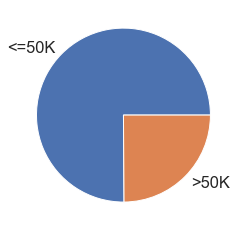

In [72]:
labels=['<=50K','>50K']
income_counts = income_dataset['income'].value_counts()
plt.pie(x=income_counts, labels=labels)


<AxesSubplot:>

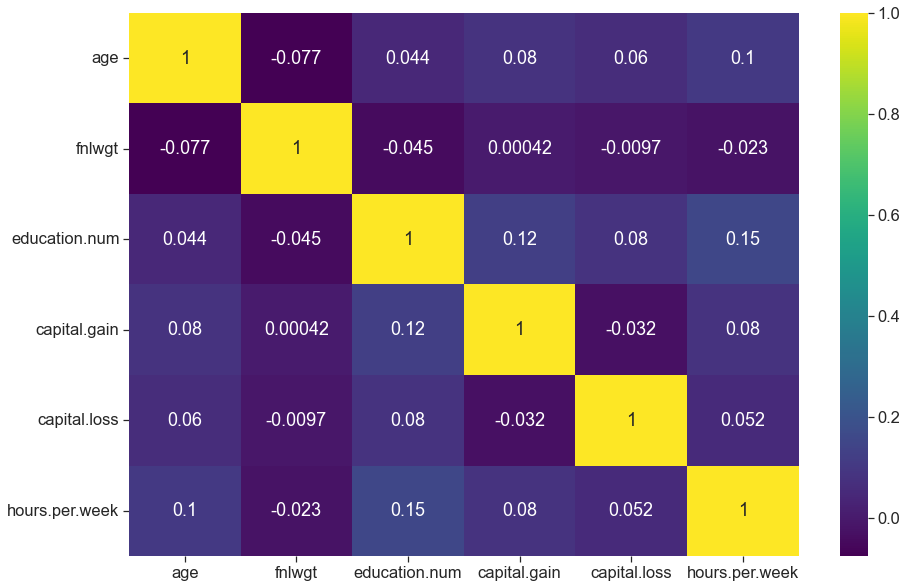

In [93]:
plt.figure(figsize=(15,10))
sns.heatmap(cont_data.corr(),cmap='viridis',annot=True)

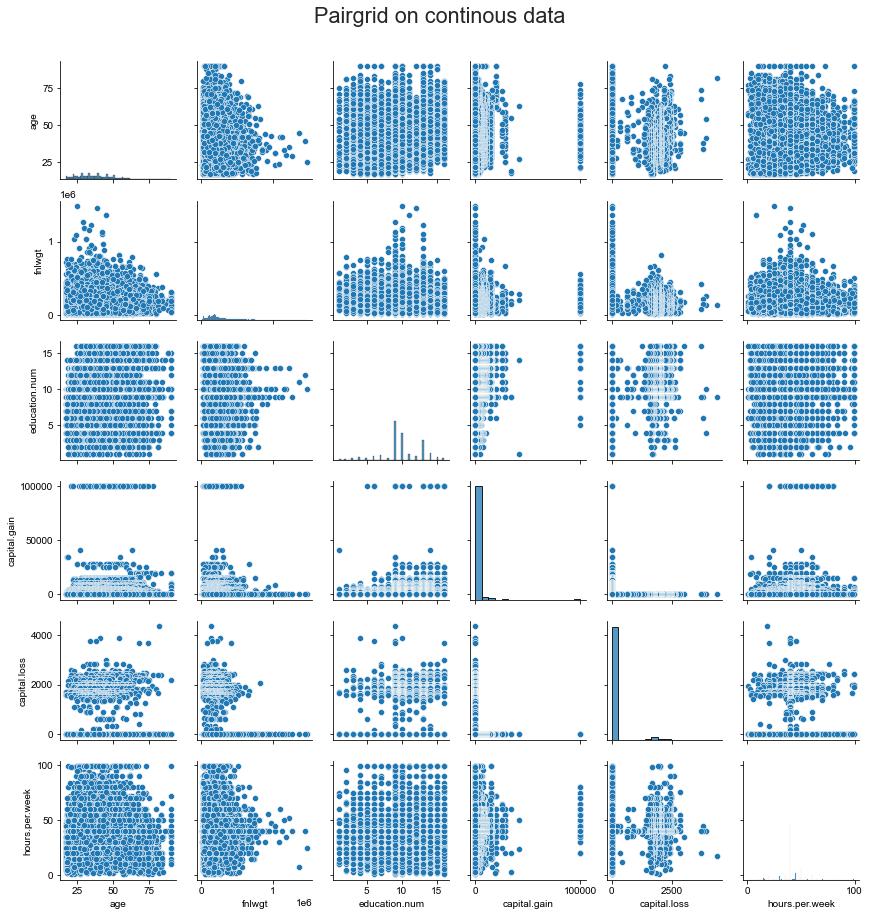

In [13]:
grid=sns.PairGrid(cont_data)
grid.map_diag(sns.histplot)
grid.map_offdiag(sns.scatterplot)
sns.set(style="ticks")
sns.despine()
grid.fig.tight_layout()
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
grid.fig.suptitle('Pairgrid on continous data', y=1.05)
grid.fig.set_figwidth(12)
grid.fig.set_figheight(12)


<AxesSubplot:xlabel='age', ylabel='Density'>

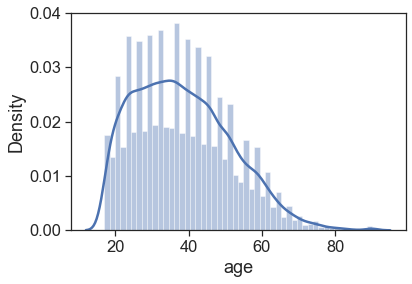

In [14]:
sns.distplot(cont_data['age'])


<AxesSubplot:xlabel='capital.loss', ylabel='Density'>

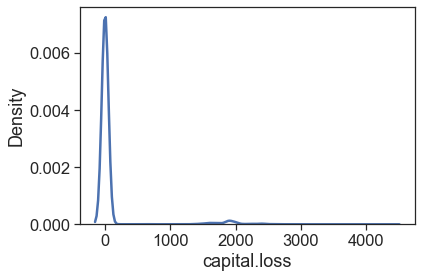

In [15]:
sns.kdeplot(cont_data['capital.loss'])

<AxesSubplot:xlabel='age', ylabel='education.num'>

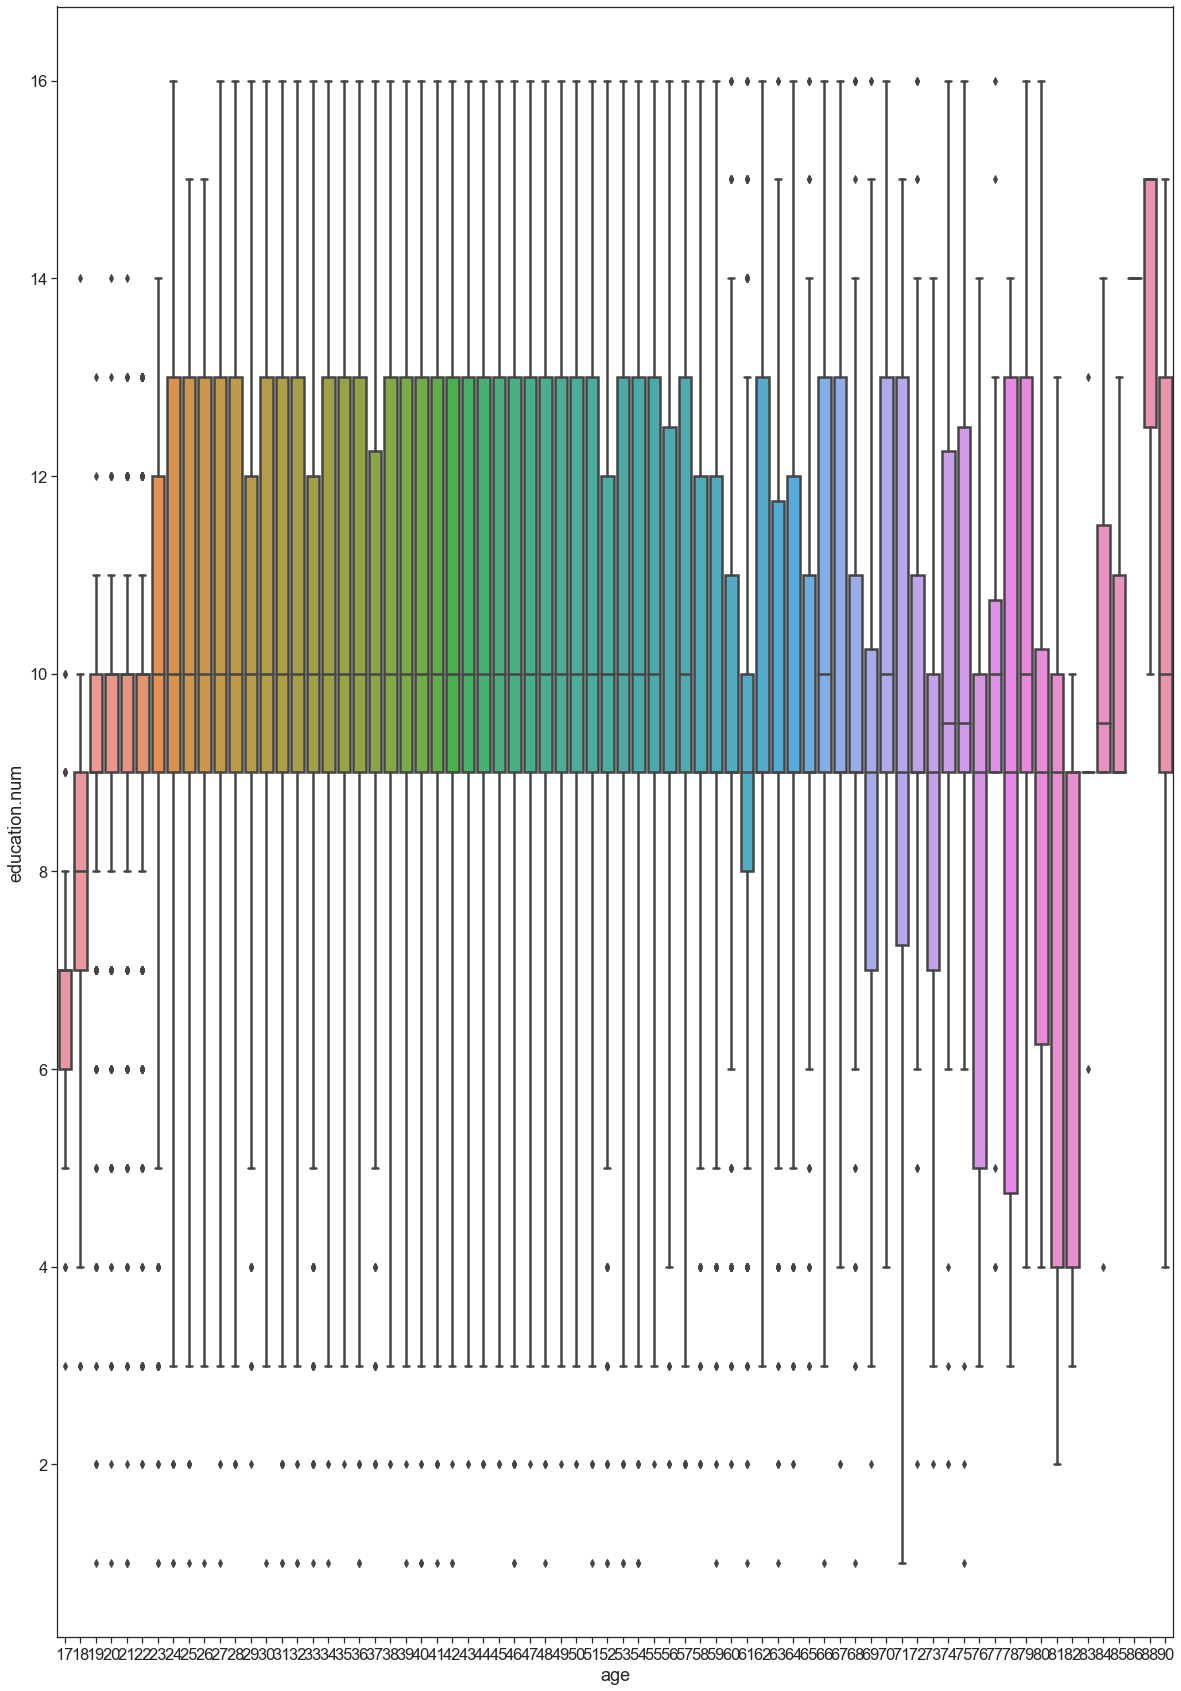

In [16]:
plt.figure(figsize=(20,30))
sns.boxplot(x='age',y='education.num',data=cont_data)

<AxesSubplot:xlabel='capital.loss'>

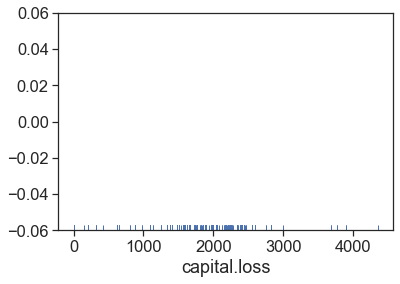

In [73]:

sns.rugplot(cont_data['capital.loss'])

<AxesSubplot:xlabel='workclass', ylabel='count'>

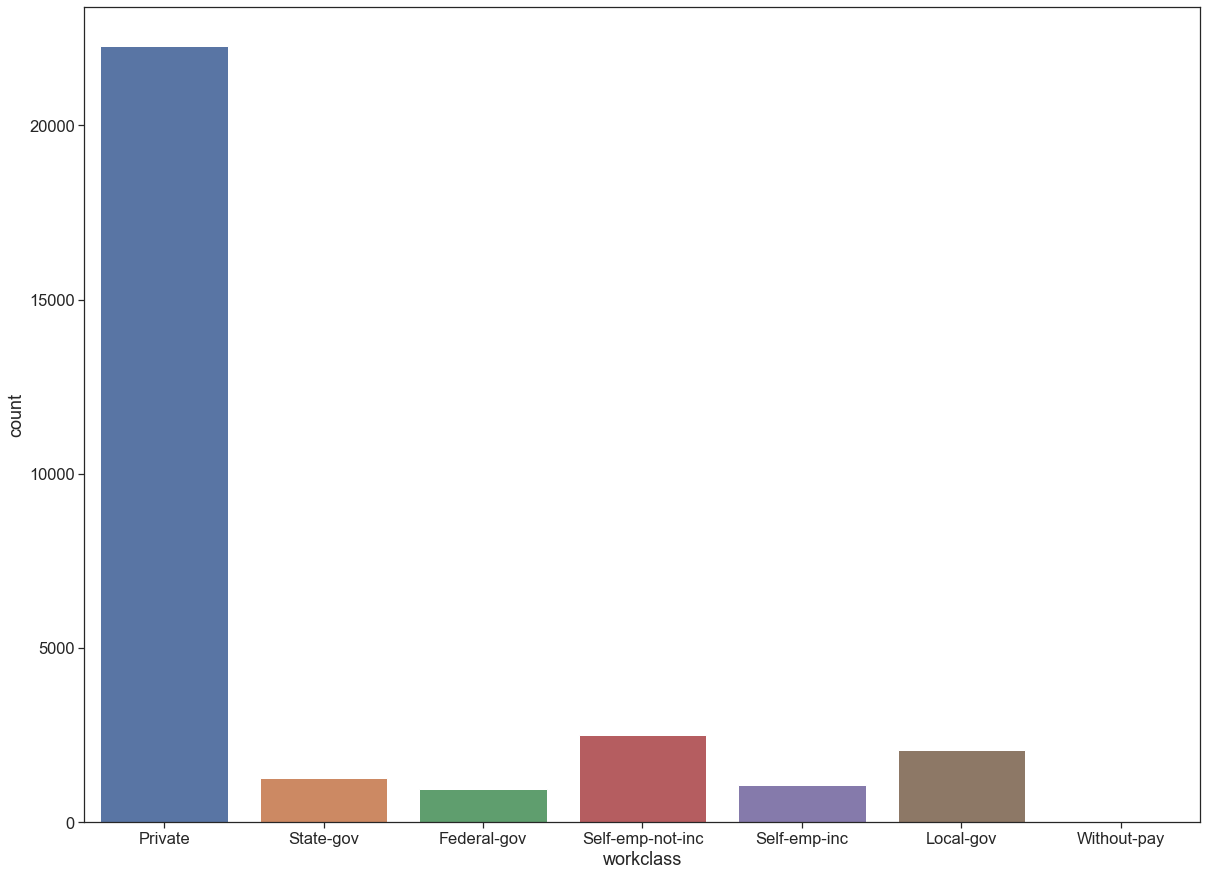

In [18]:
plt.figure(figsize=(20,15))
plt.tight_layout()
sns.countplot(cat_data['workclass'])

<AxesSubplot:xlabel='marital.status', ylabel='count'>

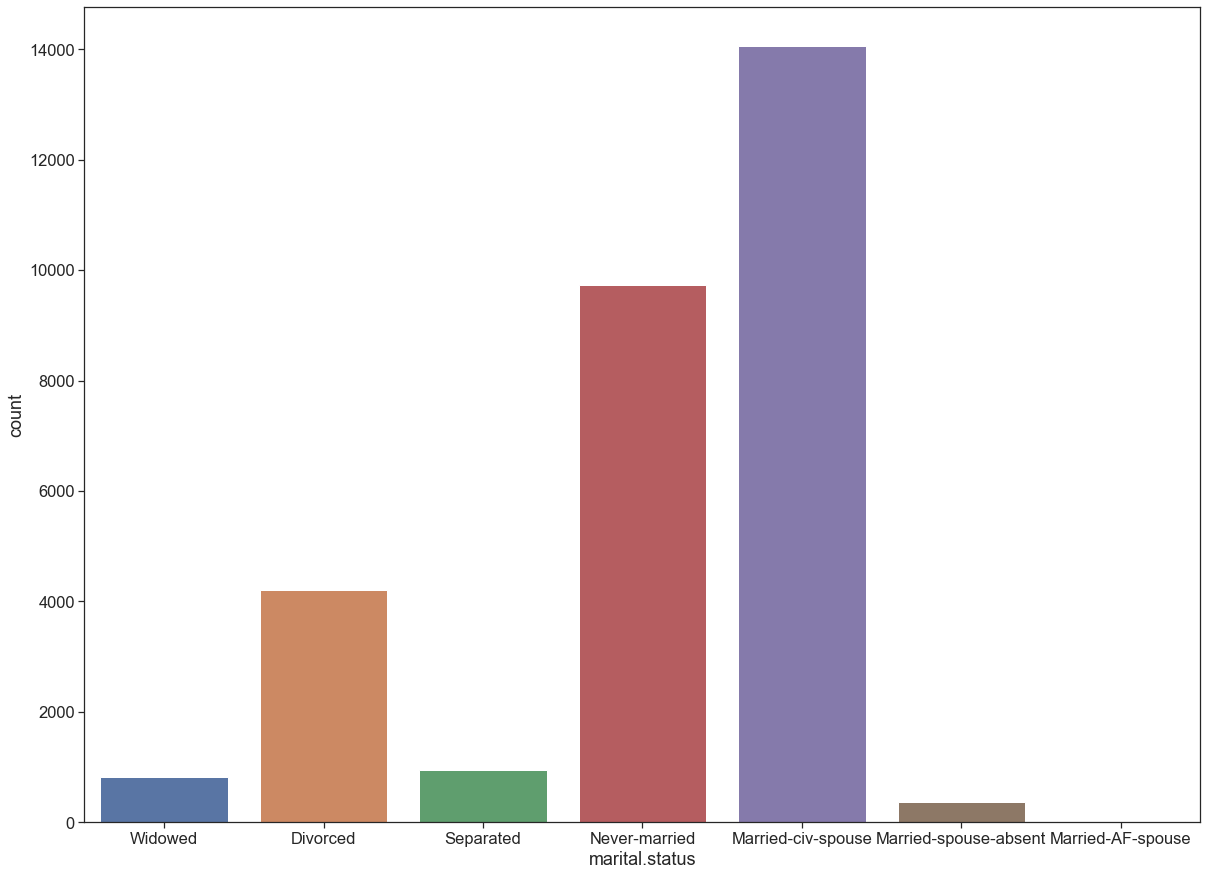

In [77]:
plt.figure(figsize=(20, 15))
plt.tight_layout()
sns.countplot(income_dataset['marital.status'])


<AxesSubplot:xlabel='education', ylabel='count'>

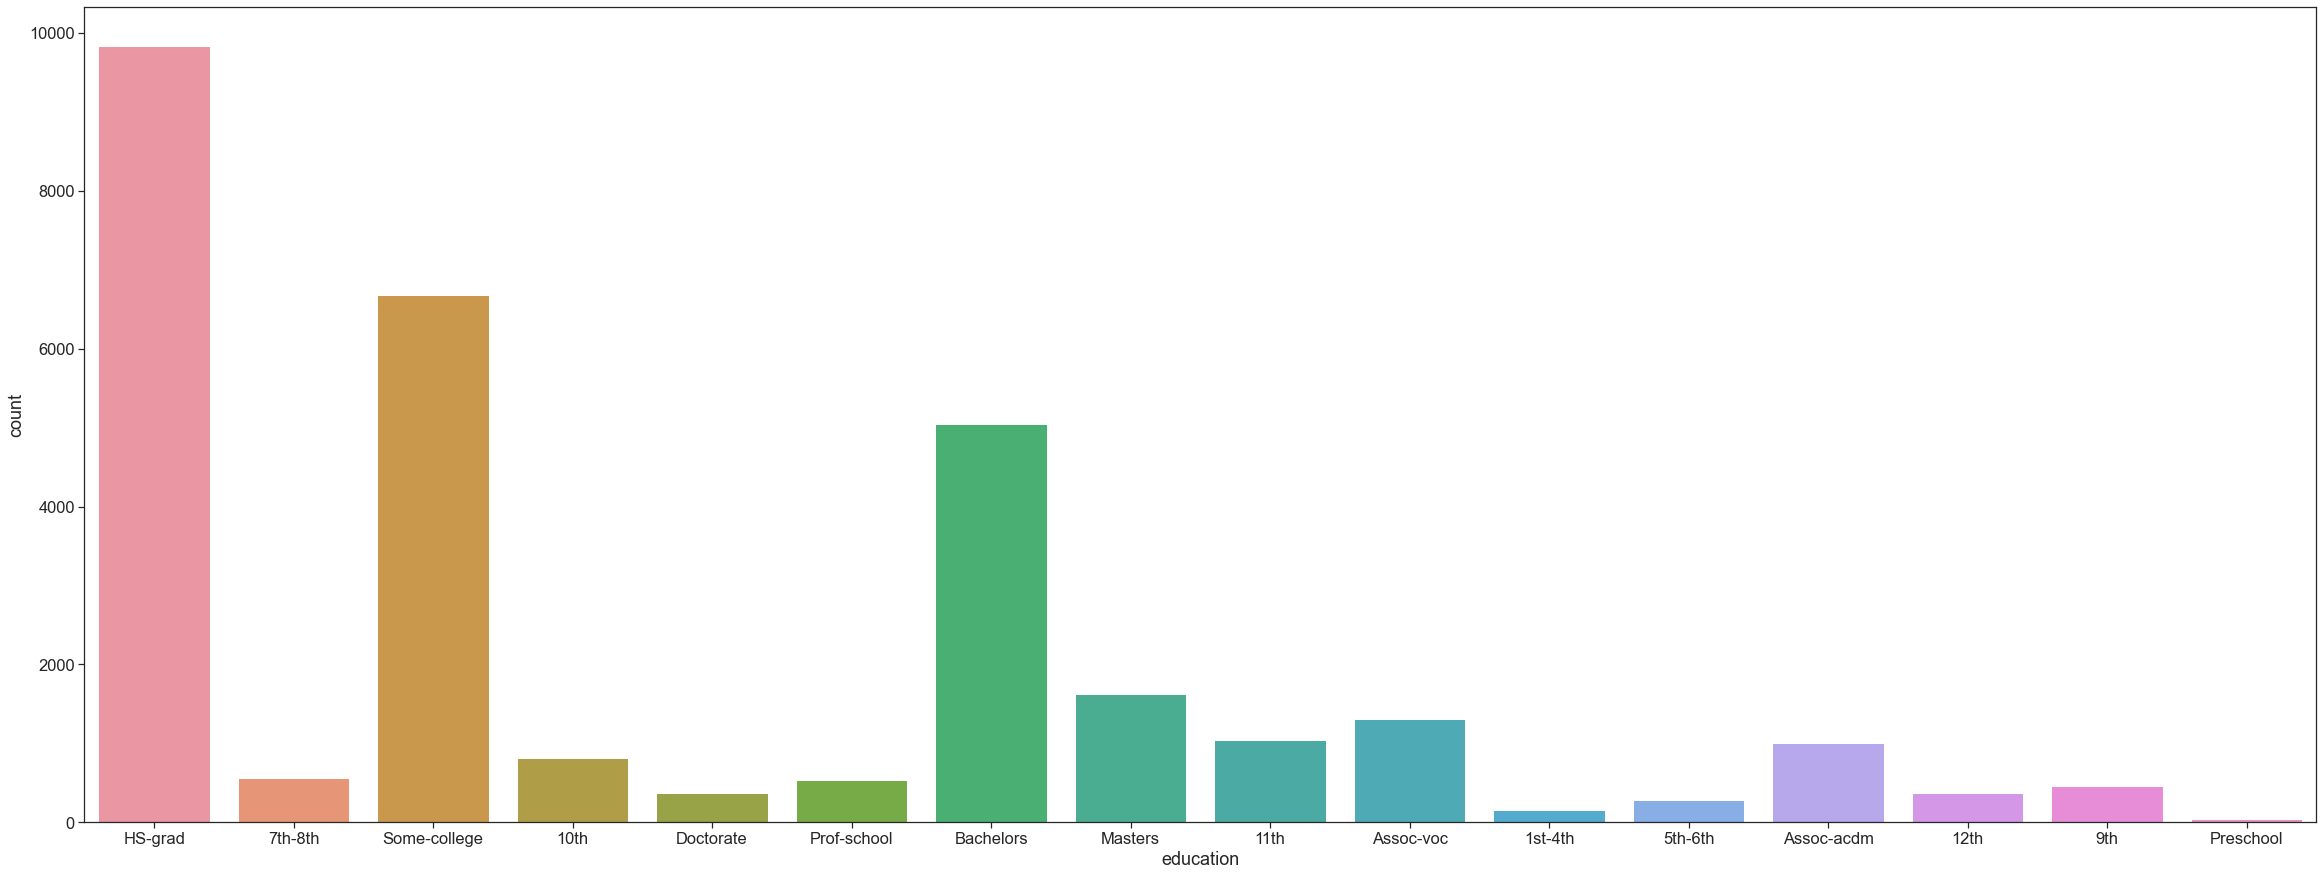

In [79]:
plt.figure(figsize=(40, 15))
plt.tight_layout()
sns.countplot(income_dataset['education'])


<AxesSubplot:xlabel='capital.gain', ylabel='Density'>

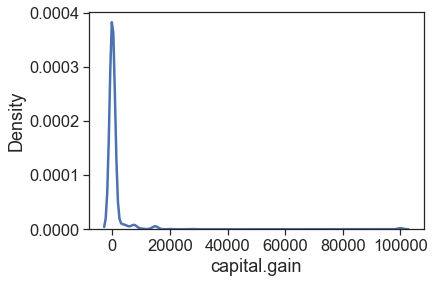

In [80]:
sns.kdeplot(income_dataset['capital.gain'])

<AxesSubplot:xlabel='capital.loss', ylabel='Density'>

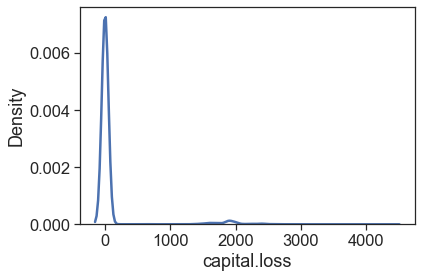

In [81]:
sns.kdeplot(income_dataset['capital.loss'])


Text(0.5, 0, 'Hours per week')

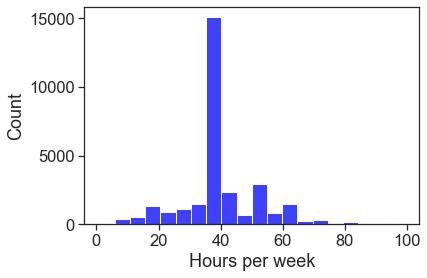

In [83]:
sns.histplot(data=income_dataset, x='hours.per.week', bins=20, color='blue')
plt.xlabel('Hours per week')


Text(0.5, 0, 'Age of employees')

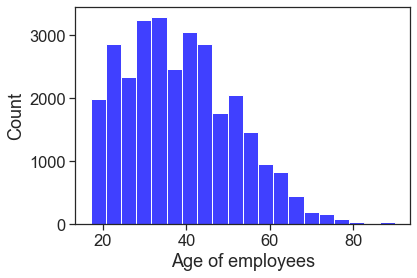

In [87]:
sns.histplot(data=income_dataset, x='age', bins=20, color='blue')
plt.xlabel('Age of employees')


<AxesSubplot:xlabel='sex', ylabel='count'>

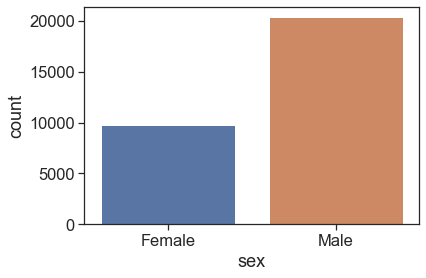

In [84]:
sns.countplot(income_dataset['sex'])

<AxesSubplot:xlabel='workclass', ylabel='count'>

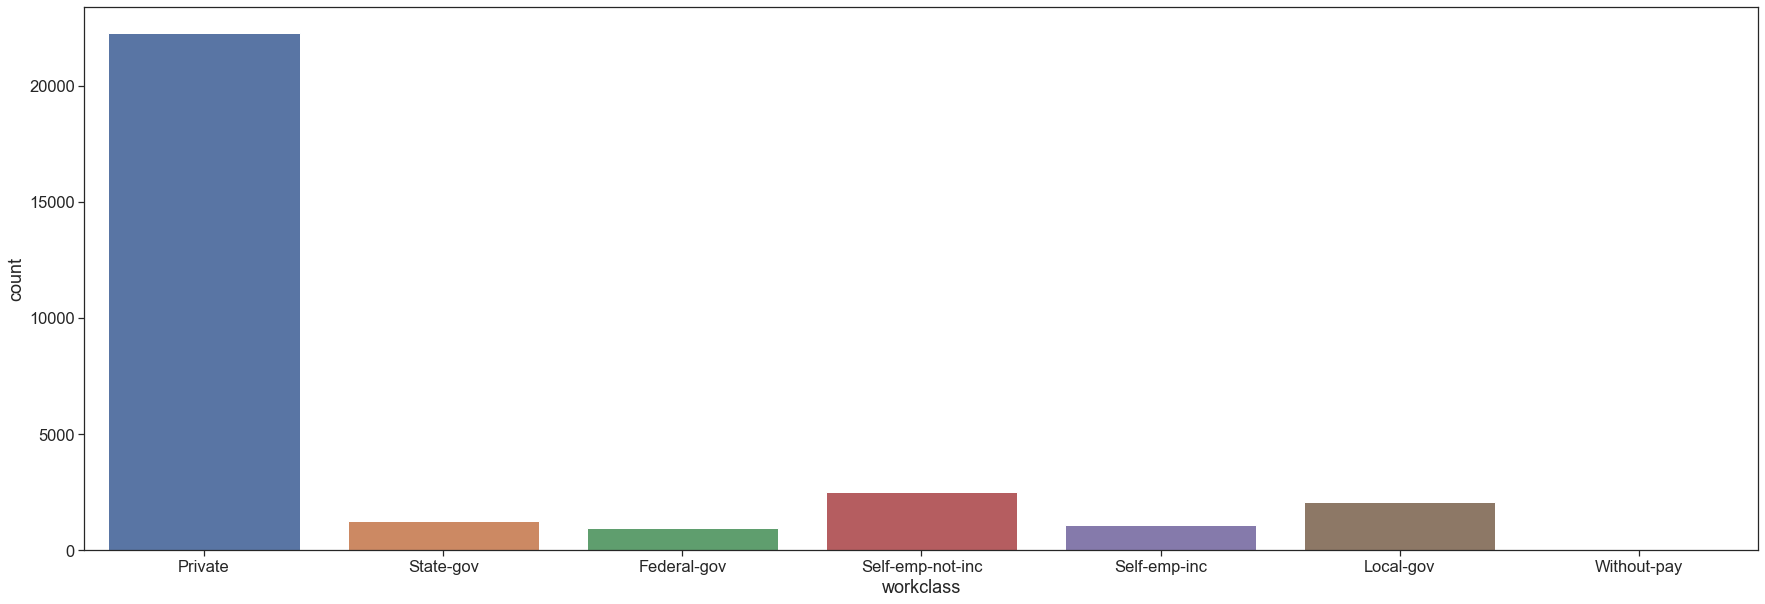

In [86]:
plt.figure(figsize=(30,10))
sns.countplot(income_dataset['workclass'])


<AxesSubplot:xlabel='occupation', ylabel='count'>

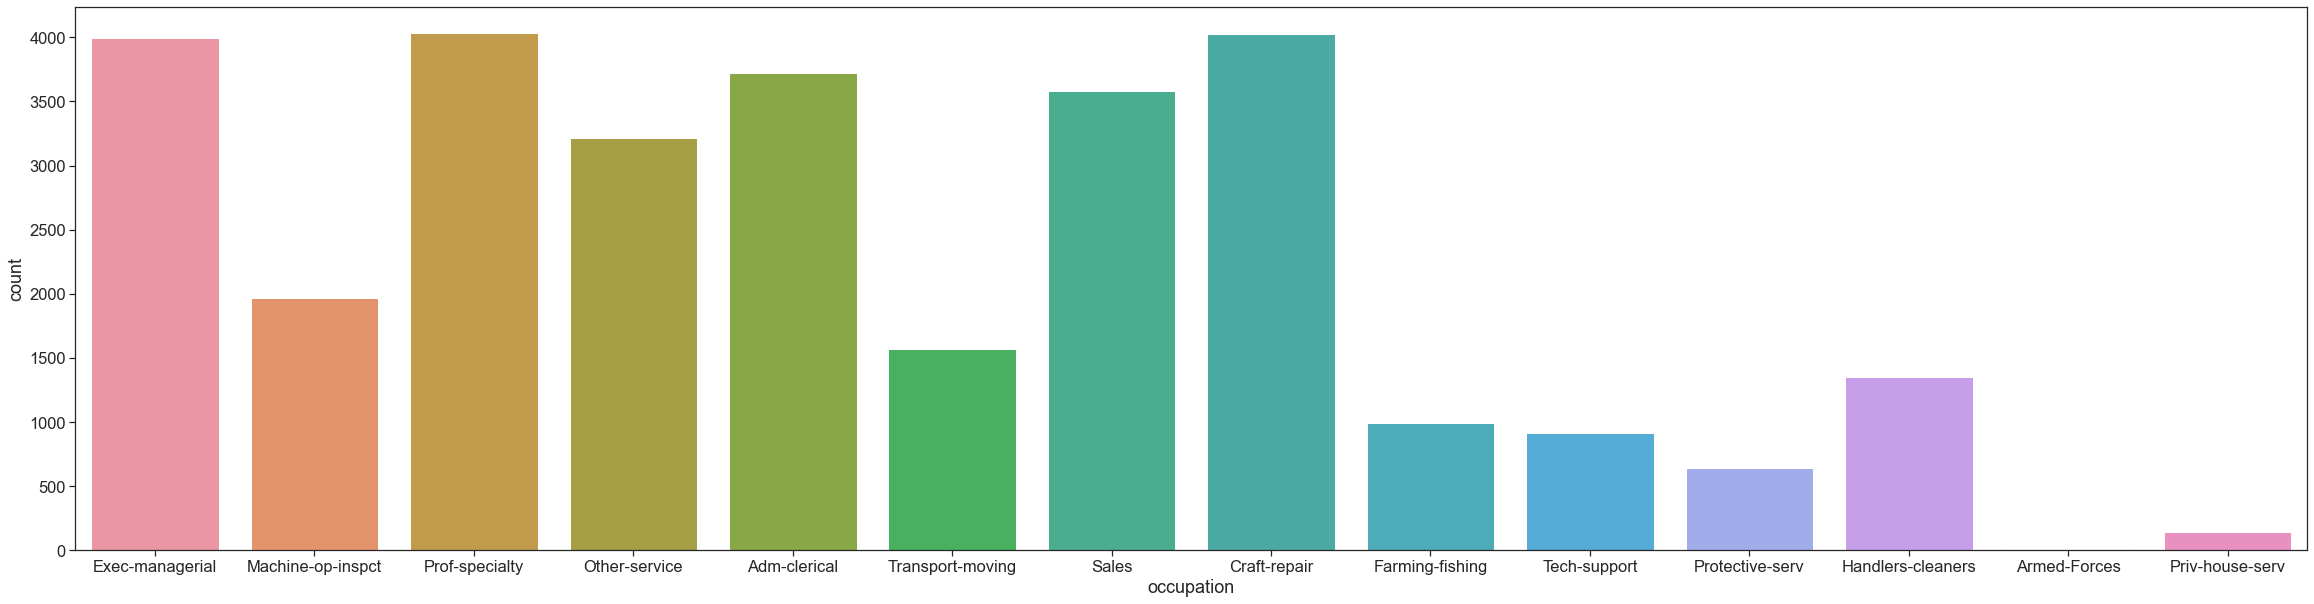

In [91]:
plt.figure(figsize=(40, 10))
sns.countplot(income_dataset['occupation'])


<AxesSubplot:xlabel='relationship', ylabel='count'>

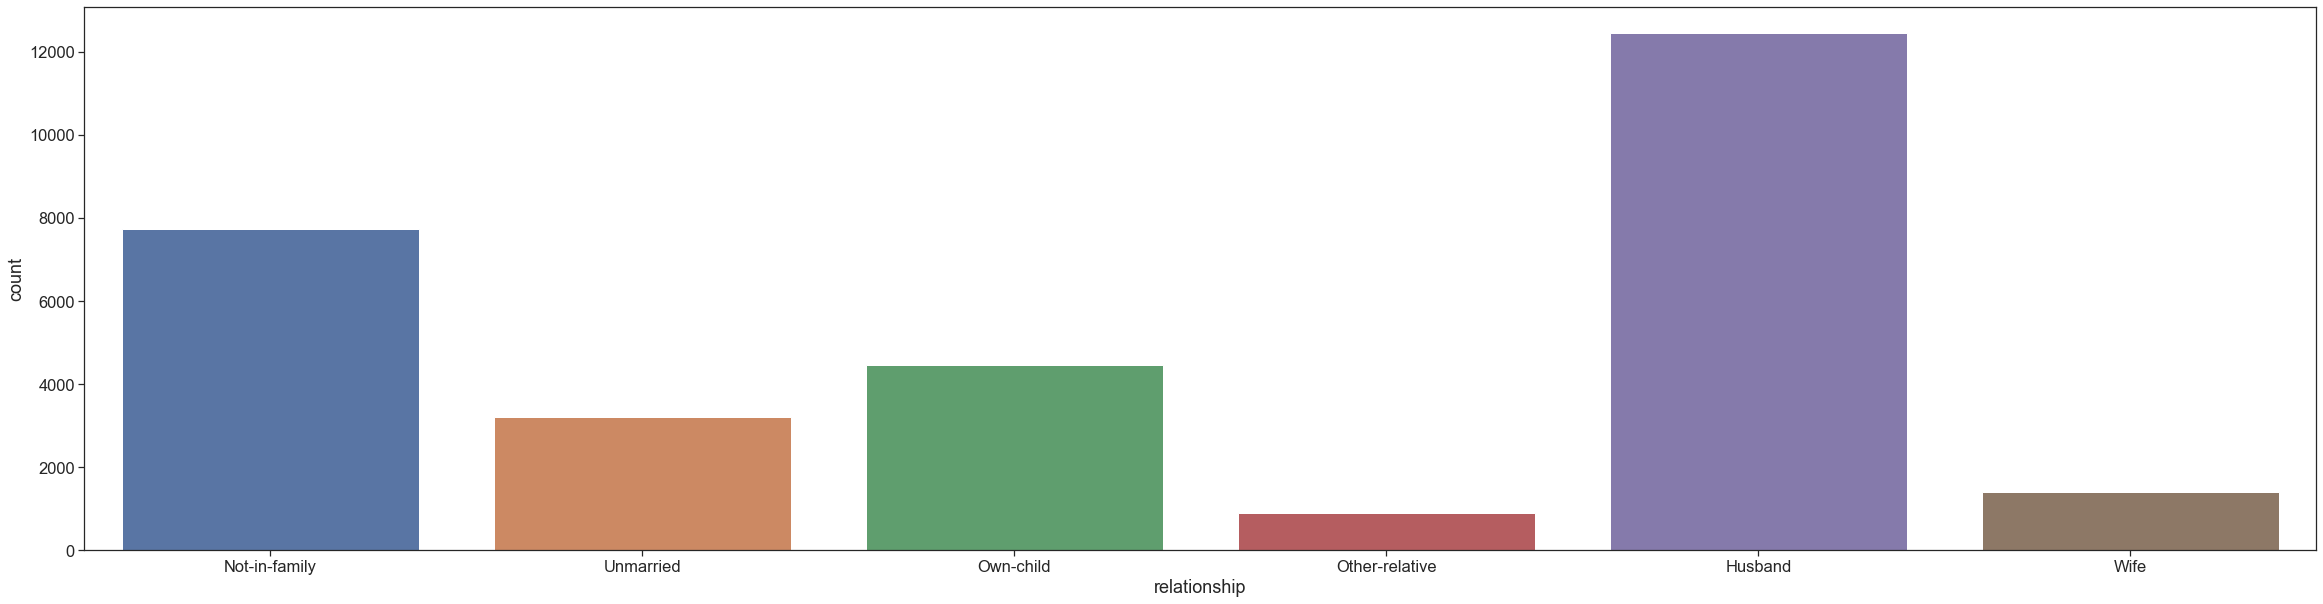

In [92]:
plt.figure(figsize=(40, 10))
sns.countplot(income_dataset['relationship'])


In [19]:
income_dataset.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [20]:
x=income_dataset.drop(['race','income'],axis=1)
y=income_dataset['income']

In [21]:
x.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,sex,capital.gain,capital.loss,hours.per.week,native.country
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,Female,0,4356,18,United-States
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,Female,0,3900,40,United-States
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,Female,0,3900,40,United-States
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,Female,0,3770,45,United-States
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,Male,0,3770,40,United-States


In [22]:
category_columns=x.select_dtypes(include=['object','bool']).columns
continuous_columns=x.select_dtypes(include=['int64','float32']).columns
print(category_columns)
print(continuous_columns)

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'sex', 'native.country'],
      dtype='object')
Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week'],
      dtype='object')


In [23]:
le=LabelEncoder()
for cat in category_columns:
  x[cat]=le.fit_transform(x[cat])
  
y=le.fit_transform(y)

In [24]:
x.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,sex,capital.gain,capital.loss,hours.per.week,native.country
1,82,2,132870,11,9,6,3,1,0,0,4356,18,38
3,54,2,140359,5,4,0,6,4,0,0,3900,40,38
4,41,2,264663,15,10,5,9,3,0,0,3900,40,38
5,34,2,216864,11,9,0,7,4,0,0,3770,45,38
6,38,2,150601,0,6,5,0,4,1,0,3770,40,38


In [25]:
y[:10].reshape(-1,1)

array([[0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1]])

In [26]:
rb=RobustScaler() #RobustScaler is a variant of StandardScaler that is Robust to Outliners

for cont in continuous_columns:
  x[[cont]]=rb.fit_transform(x[[cont]])

In [27]:
x.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,sex,capital.gain,capital.loss,hours.per.week,native.country
1,2.368421,2,-0.379621,11,-0.25,6,3,1,0,0.0,4356.0,-4.4,38
3,0.894737,2,-0.317213,5,-1.50,0,6,4,0,0.0,3900.0,0.0,38
4,0.210526,2,0.718643,15,0.00,5,9,3,0,0.0,3900.0,0.0,38
5,-0.157895,2,0.320322,11,-0.25,0,7,4,0,0.0,3770.0,1.0,38
6,0.052632,2,-0.231864,0,-1.00,5,0,4,1,0.0,3770.0,0.0,38


In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,train_size=0.7)

PRINCIPLE COMPONENT ANALYSIS

In [29]:
pca=PCA(n_components=2)
pca

PCA(n_components=2)

In [30]:
principal_components=pca.fit_transform(x)
principal_components

array([[-1099.53690522,  4265.69153127],
       [-1098.73220777,  3809.69300638],
       [-1098.73203353,  3809.69466086],
       ...,
       [-1091.85017757,   -90.29853716],
       [-1091.8503306 ,   -90.30098935],
       [-1091.85041599,   -90.3019201 ]])

In [31]:
principal_df=pd.DataFrame(data=principal_components,columns=['PC1','PC2'])
principal_df['target']=y


Text(0.5, 1.0, 'Principal component analysis in 2D')

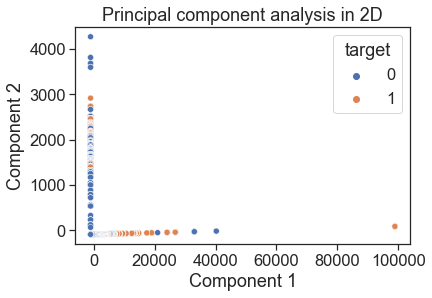

In [32]:
sns.scatterplot(x='PC1',y='PC2',hue='target',data=principal_df)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title("Principal component analysis in 2D")

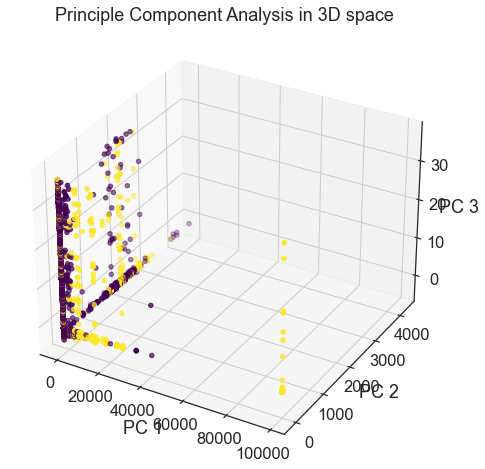

<Figure size 432x288 with 0 Axes>

In [33]:
pca3d=PCA(n_components=3)
x_pca=pca3d.fit_transform(x)
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_pca[:, 0], x_pca[:, 1], x_pca[:, 2], c=y, cmap='viridis')
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
plt.title("Principle Component Analysis in 3D space")
plt.show()
plt.tight_layout()



DEFINING MODEL METRICS

In [34]:
def model_cross_validator(model,x_train,y_train):
  
  validation_procedure=RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=15)
  
  score=cross_val_score(model,x_train,y_train,scoring='accuracy',cv=validation_procedure)
  
  return score

In [35]:
def model_evaluator(actual_income,pred_income):
  
  model_scores={
    'accuracy-':round(accuracy_score(actual_income,pred_income),4),
    'balanced_accuracy-':round(balanced_accuracy_score(actual_income,pred_income),4),
    'precision-':round(precision_score(actual_income,pred_income),4),
    'recall-':round(recall_score(actual_income,pred_income),4)
    
  }
  
  return model_scores

In [36]:
def draw_cm(actual_income,pred_income):
  cm=confusion_matrix(actual_income,pred_income)
  group_names = ["FN","FP","TN","TP"]
  group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
   

LOGISTIC REGRESSION


In [37]:
log_model=LogisticRegression()

logreg_param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

logreg_grid_search=GridSearchCV(log_model,param_grid=logreg_param_grid,cv=5)
logreg_grid_search.fit(x_train,y_train)
best_model=logreg_grid_search.best_estimator_
logreg_pred=best_model.predict(x_test)
print(f"Best hyperparameters for Logistic Regression:{logreg_grid_search.best_params_}")
logreg_crossval_score=model_cross_validator(best_model,x_train,y_train)
logreg_metrics=model_evaluator(y_test,logreg_pred)
print(f"Cross Validation Score for Logistic Regression:{logreg_crossval_score}")
print(f"LogisticRegression results:{logreg_metrics}")

Best hyperparameters for Logistic Regression:{'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Cross Validation Score for Logistic Regression:[0.82575758 0.82386364 0.83191288 0.82520133 0.82946471 0.82046423
 0.81951682 0.81667456 0.81620085 0.81193747 0.82575758 0.82386364
 0.83001894 0.83088584 0.82141165 0.81525343 0.82567504 0.81572714
 0.81241118 0.81667456 0.81344697 0.83001894 0.82433712 0.81146376
 0.82093794 0.82141165 0.82472762 0.82046423 0.81572714 0.82614874]
LogisticRegression results:{'accuracy-': 0.818, 'balanced_accuracy-': 0.6987, 'precision-': 0.7238, 'recall-': 0.4566}


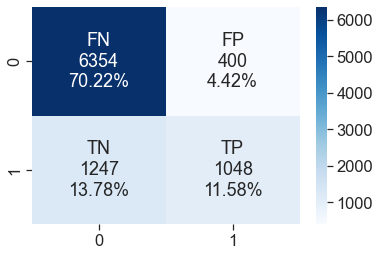

In [38]:
draw_cm(y_test,logreg_pred)

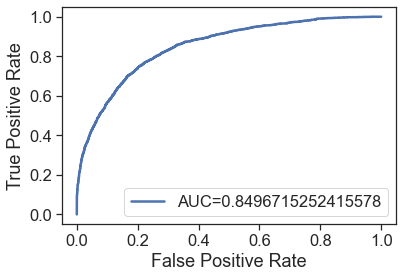

In [39]:
y_pred_proba=best_model.predict_proba(x_test)[::,1]
fpr,tpr,_=roc_curve(y_test,y_pred_proba)
auc_logreg=roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr, tpr, label="AUC="+str(auc_logreg))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()


STOCHASTIC GRADIENT DESCENT(SGD) CLASSIFIER

In [40]:
sgd_model=SGDClassifier()

sgd_param_grid={
  'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
  'penalty': ['l1', 'l2', 'elasticnet'],
  'alpha': [0.0001, 0.001, 0.01, 0.1],
  #'max_iter': [10000],
  'tol': [1e-3, 1e-4, 1e-5]
}

sgd_grid_search=GridSearchCV(sgd_model,param_grid=sgd_param_grid,cv=5)
sgd_grid_search.fit(x_train,y_train)
best_sgd_model=sgd_grid_search.best_estimator_
sgd_pred=best_sgd_model.predict(x_test)
print(f"Best hyperparameters for SGD Classification:{sgd_grid_search.best_params_}")
sgd_crossval_score = model_cross_validator(best_sgd_model, x_train, y_train)
sgd_metrics = model_evaluator(y_test, sgd_pred)
print(f"Cross Validation Score for SGD Classification:{sgd_crossval_score}")
print(f"SGD Classification results:{sgd_metrics}")





Best hyperparameters for SGD Classification:{'alpha': 0.01, 'loss': 'hinge', 'penalty': 'elasticnet', 'tol': 0.0001}
Cross Validation Score for SGD Classification:[0.78977273 0.79498106 0.77414773 0.79109427 0.78872572 0.79109427
 0.78398863 0.7925154  0.77593558 0.78825201 0.79592803 0.79498106
 0.80823864 0.80577925 0.79630507 0.79583136 0.80577925 0.79725249
 0.79062056 0.79393652 0.79214015 0.80776515 0.79308712 0.78446234
 0.79393652 0.78825201 0.80056845 0.78635718 0.78635718 0.71387968]
SGD Classification results:{'accuracy-': 0.8022, 'balanced_accuracy-': 0.6812, 'precision-': 0.6689, 'recall-': 0.4357}


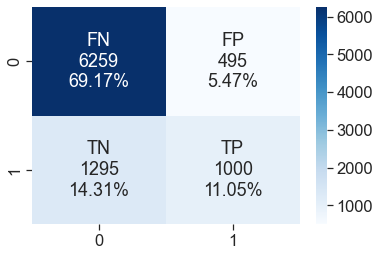

In [41]:
draw_cm(y_test,sgd_pred)

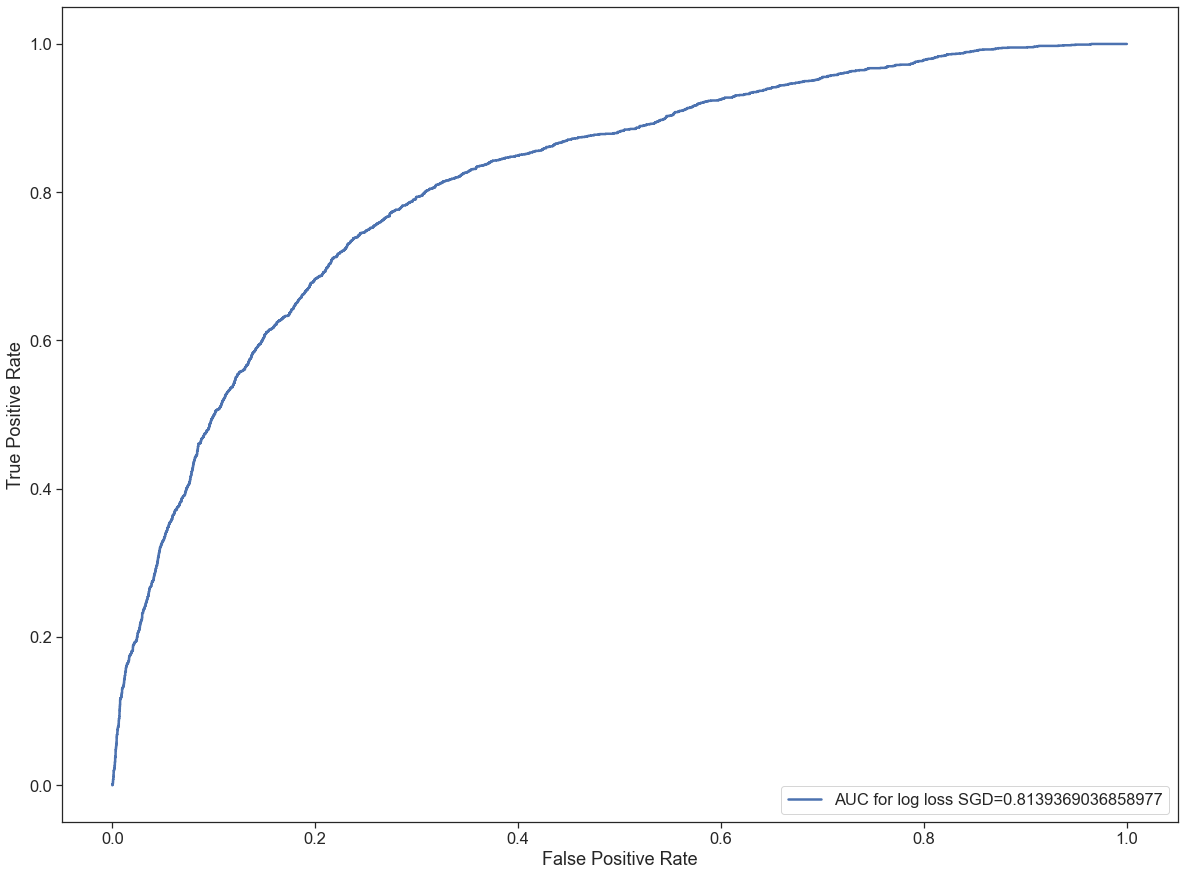

In [42]:
plt.figure(figsize=(20,15))
auc_sgd = SGDClassifier(alpha=0.01, loss='log', penalty='elasticnet', tol=0.0001)
auc_sgd.fit(x_train,y_train)
y_pred_proba = auc_sgd.predict_proba(x_test)[::, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc_sgd = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="AUC for log loss SGD="+str(auc_sgd))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()


K NEAREST NEIGHBORS

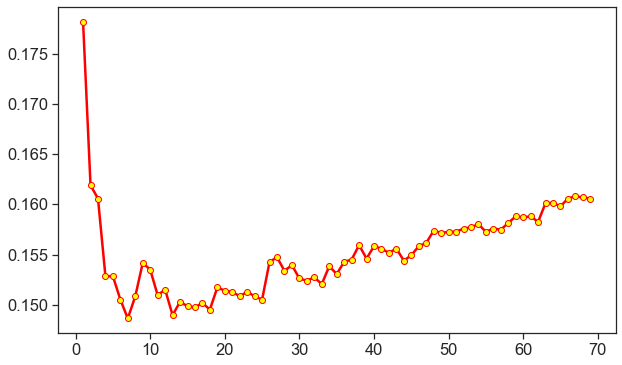

In [43]:
error_rate=[]

for i in range(1,70):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  pred_i=knn.predict(x_test)
  error_rate.append(np.mean(pred_i!=y_test))
  
plt.figure(figsize=(10,6))
plt.plot(range(1,70),error_rate,color='red',marker='o',markerfacecolor='yellow')

In [44]:
# We have least error rate at k=7

knn_model=KNeighborsClassifier()

knn_param_grid={
  'n_neighbors':[7],
  'weights':['uniform','distance'],
  'p':[1,2],
  'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
  'algorithm':['auto','ball_tree','kd_tree','brute'],
  'leaf_size':[30]
}
knn_grid_search = GridSearchCV(knn_model, param_grid=knn_param_grid, cv=5)
knn_grid_search.fit(x_train, y_train)
best_knn_model = knn_grid_search.best_estimator_
knn_pred = best_knn_model.predict(x_test)
print(f"Best hyperparameters for KNN Classification:{knn_grid_search.best_params_}")
knn_crossval_score = model_cross_validator(best_knn_model, x_train, y_train)
knn_metrics = model_evaluator(y_test, knn_pred)
print(f"Cross Validation Score for KNN Classification:{knn_crossval_score}")
print(f"KNN Classification results:{knn_metrics}")



Best hyperparameters for KNN Classification:{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'manhattan', 'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
Cross Validation Score for KNN Classification:[0.84659091 0.85606061 0.84706439 0.86167693 0.8602558  0.84746566
 0.83514922 0.86072951 0.86215064 0.85078162 0.84185606 0.85795455
 0.85179924 0.85551871 0.85741355 0.8498342  0.8394126  0.86925628
 0.84936049 0.855045   0.859375   0.85748106 0.86126894 0.85693984
 0.85883468 0.84651824 0.86072951 0.85362387 0.84320227 0.84130744]
KNN Classification results:{'accuracy-': 0.8531, 'balanced_accuracy-': 0.7874, 'precision-': 0.7372, 'recall-': 0.654}


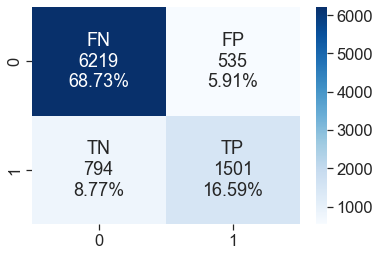

In [45]:
draw_cm(y_test,knn_pred)

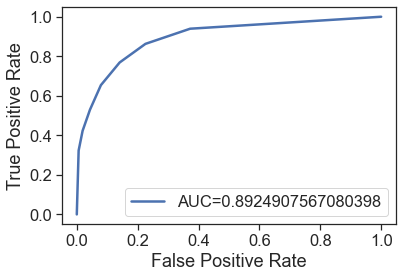

In [46]:
y_pred_proba = best_knn_model.predict_proba(x_test)[::, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc_knn = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="AUC="+str(auc_knn))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()


DECISION TREE CLASSIFICATION

In [47]:
dtc=DecisionTreeClassifier()

dtc_param_grid={
  'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth': range(0,15),
  'min_samples_split': [2,4,6,8],
  'min_samples_leaf': [1,2,3,4],
  'max_features': ['sqrt', 'log2']
}

dtc_grid_search = GridSearchCV(dtc, param_grid=dtc_param_grid, cv=5)
dtc_grid_search.fit(x_train, y_train)
best_dtc_model = dtc_grid_search.best_estimator_
dtc_pred = best_dtc_model.predict(x_test)
print(f"Best hyperparameters for Decision Tree Classification:{dtc_grid_search.best_params_}")
dtc_crossval_score = model_cross_validator(best_dtc_model, x_train, y_train)
dtc_metrics = model_evaluator(y_test, dtc_pred)
print(f"Cross Validation Score for Decision Tree Classification:{dtc_crossval_score}")
print(f"Decision Tree Classification results:{dtc_metrics}")




Best hyperparameters for Decision Tree Classification:{'criterion': 'gini', 'max_depth': 12, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'}
Cross Validation Score for Decision Tree Classification:[0.8342803  0.84895833 0.8342803  0.84604453 0.85125533 0.83609664
 0.83562293 0.8394126  0.84936049 0.83609664 0.8342803  0.84659091
 0.83901515 0.83988631 0.84841307 0.83230696 0.83799147 0.85078162
 0.84367598 0.82709616 0.84185606 0.84375    0.84469697 0.84036002
 0.84130744 0.84557082 0.85551871 0.83751776 0.83088584 0.84130744]
Decision Tree Classification results:{'accuracy-': 0.8425, 'balanced_accuracy-': 0.7448, 'precision-': 0.7656, 'recall-': 0.5464}


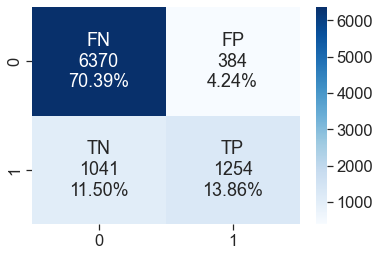

In [48]:
draw_cm(y_test,dtc_pred)

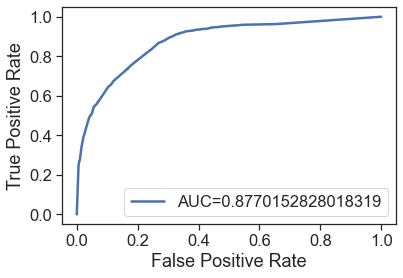

In [49]:
y_pred_proba = best_dtc_model.predict_proba(x_test)[::, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc_dtc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="AUC="+str(auc_dtc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()


RANDOM FOREST CLASSIFIER

In [50]:
rfc=RandomForestClassifier()
rfc_param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'max_features': ['auto', 'sqrt', 'log2']
}

rfc_grid_search = GridSearchCV(rfc, param_grid=rfc_param_grid, cv=5)
rfc_grid_search.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 50, 100, 200]})

In [51]:
best_rfc_model = rfc_grid_search.best_estimator_
rfc_pred = best_rfc_model.predict(x_test)
print( f"Best hyperparameters for Decision Tree Classification:{rfc_grid_search.best_params_}")
rfc_crossval_score = model_cross_validator(best_rfc_model, x_train, y_train)
rfc_metrics = model_evaluator(y_test, rfc_pred)
print(f"Cross Validation Score for Random Forest Classification:{rfc_crossval_score}")
print(f"Random Forest Classification results:{rfc_metrics}")


Best hyperparameters for Decision Tree Classification:{'max_depth': 20, 'max_features': 'auto', 'n_estimators': 200}
Cross Validation Score for Random Forest Classification:[0.85369318 0.85653409 0.859375   0.85030791 0.87494079 0.855045
 0.84699195 0.85930838 0.86594031 0.85078162 0.85748106 0.86363636
 0.85179924 0.85883468 0.87020369 0.84888678 0.85220275 0.86215064
 0.86072951 0.85220275 0.85795455 0.8499053  0.87215909 0.85315017
 0.86404548 0.85788726 0.8654666  0.85883468 0.84225486 0.85457129]
Random Forest Classification results:{'accuracy-': 0.8593, 'balanced_accuracy-': 0.7851, 'precision-': 0.7704, 'recall-': 0.6344}


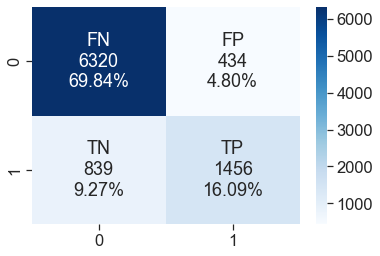

In [52]:
draw_cm(y_test,rfc_pred)

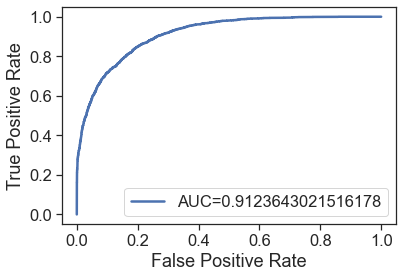

In [53]:
y_pred_proba = best_rfc_model.predict_proba(x_test)[::, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc_rfc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="AUC="+str(auc_rfc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()


GRADIENT BOOSTING CLASSIFIER

In [54]:
gbc=GradientBoostingClassifier()

gbc_param_grid={
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [2, 3, 4],
    'min_samples_split': [2, 4, 6]
}

gbc_grid_search = GridSearchCV(gbc, param_grid=gbc_param_grid, cv=5)
gbc_grid_search.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'max_depth': [2, 3, 4], 'min_samples_split': [2, 4, 6],
                         'n_estimators': [50, 100, 200]})

In [55]:
best_gbc_model = gbc_grid_search.best_estimator_
gbc_pred = best_gbc_model.predict(x_test)
print(f"Best hyperparameters for Gradient Boosting  Classification:{gbc_grid_search.best_params_}")
gbc_crossval_score = model_cross_validator(best_gbc_model, x_train, y_train)
gbc_metrics = model_evaluator(y_test, gbc_pred)
print(f"Cross Validation Score for Gradient Boosting Classification:{gbc_crossval_score}")
print(f"Gradient Boosting Classification results:{gbc_metrics}")


Best hyperparameters for Gradient Boosting  Classification:{'learning_rate': 0.1, 'max_depth': 4, 'min_samples_split': 6, 'n_estimators': 200}
Cross Validation Score for Gradient Boosting Classification:[0.86742424 0.87263258 0.8688447  0.87162482 0.8910469  0.86594031
 0.85457129 0.86783515 0.88109901 0.85883468 0.8655303  0.87310606
 0.87168561 0.86736144 0.87636191 0.86120322 0.86167693 0.87683562
 0.87351966 0.86688773 0.86695076 0.86931818 0.87689394 0.86736144
 0.87446708 0.8754145  0.86925628 0.87304595 0.86167693 0.86878257]
Gradient Boosting Classification results:{'accuracy-': 0.8699, 'balanced_accuracy-': 0.8005, 'precision-': 0.7927, 'recall-': 0.6597}


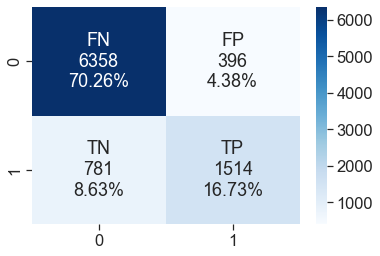

In [56]:
draw_cm(y_test,gbc_pred)

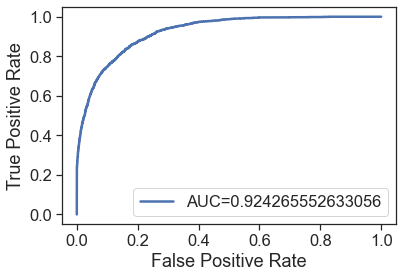

In [57]:
y_pred_proba = best_gbc_model.predict_proba(x_test)[::, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc_gbc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="AUC="+str(auc_gbc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()


ADAPTIVE BOOSTING CLASSIFIER

In [58]:
ada=AdaBoostClassifier()

ada_param_grid={
  'n_estimators': [50, 100, 200],
  'learning_rate': [0.01,0.1, 0.5, 1]
}
ada_grid_search = GridSearchCV(ada, param_grid=ada_param_grid, cv=5)
ada_grid_search.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.5, 1],
                         'n_estimators': [50, 100, 200]})

In [59]:
best_ada_model = ada_grid_search.best_estimator_
ada_pred = best_ada_model.predict(x_test)
print(f"Best hyperparameters for Adaptive Boosting Classification:{ada_grid_search.best_params_}")
ada_crossval_score = model_cross_validator(best_ada_model, x_train, y_train)
ada_metrics = model_evaluator(y_test, ada_pred)
print(f"Cross Validation Score for Adaptive Boosting Classification:{ada_crossval_score}")
print(f"Adaptive Boosting Classification results:{ada_metrics}")


Best hyperparameters for Adaptive Boosting Classification:{'learning_rate': 1, 'n_estimators': 200}
Cross Validation Score for Adaptive Boosting Classification:[0.86221591 0.86363636 0.85511364 0.87020369 0.88015159 0.8654666
 0.84936049 0.86357177 0.87115111 0.85741355 0.86363636 0.87784091
 0.86695076 0.86736144 0.86878257 0.85030791 0.85551871 0.86972999
 0.86451919 0.85788726 0.859375   0.86647727 0.86789773 0.855045
 0.86594031 0.86830886 0.86641402 0.87304595 0.85693984 0.86357177]
Adaptive Boosting Classification results:{'accuracy-': 0.8664, 'balanced_accuracy-': 0.7943, 'precision-': 0.7876, 'recall-': 0.6479}


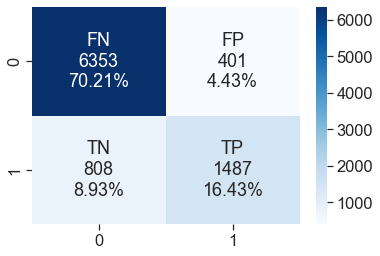

In [60]:
draw_cm(y_test,ada_pred)

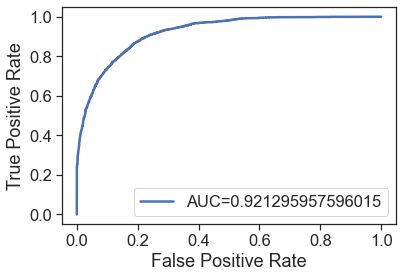

In [62]:
y_pred_proba = best_ada_model.predict_proba(x_test)[::, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc_ada = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="AUC="+str(auc_ada))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()


VISUALIZING THE RESULTS

In [63]:
results=pd.DataFrame({
  'Models':['LogReg','SGD','KNN','Decison tree','Random Forest','GBC','AdaBoost'],
  'AccuracyScore':[logreg_metrics['accuracy-'],sgd_metrics['accuracy-'],knn_metrics['accuracy-'],dtc_metrics['accuracy-'],rfc_metrics['accuracy-'],gbc_metrics['accuracy-'],ada_metrics['accuracy-']],
  'Balanced Accuracy Score':[logreg_metrics['balanced_accuracy-'],sgd_metrics['balanced_accuracy-'],knn_metrics['balanced_accuracy-'],dtc_metrics['balanced_accuracy-'],rfc_metrics['balanced_accuracy-'],gbc_metrics['balanced_accuracy-'],ada_metrics['balanced_accuracy-']],
  'Mean Cross Validation Score':[np.mean(np.round(logreg_crossval_score,4)),np.mean(np.round(sgd_crossval_score,4)),np.mean(np.round(knn_crossval_score,4)),np.mean(np.round(dtc_crossval_score,4)),np.mean(np.round(rfc_crossval_score,4)),np.mean(np.round(gbc_crossval_score,4)),np.mean(np.round(ada_crossval_score,4))],
  'Precision':[logreg_metrics['precision-'],sgd_metrics['precision-'],knn_metrics['precision-'],dtc_metrics['precision-'],rfc_metrics['precision-'],gbc_metrics['precision-'],ada_metrics['precision-']],
  'Recall':[logreg_metrics['recall-'],sgd_metrics['recall-'],knn_metrics['recall-'],dtc_metrics['recall-'],rfc_metrics['recall-'],gbc_metrics['recall-'],ada_metrics['recall-']],
  'AUC Score':[auc_logreg,auc_sgd,auc_knn,auc_dtc,auc_rfc,auc_gbc,auc_ada],
})
results.set_index(pd.Index([1,2,3,4,5,6,7]),inplace=True)
results

,Models,AccuracyScore,Balanced Accuracy Score,Mean Cross Validation Score,Precision,Recall,AUC Score
1,LogReg,0.8180,0.6987,0.821580,0.7238,0.4566,0.849672
2,SGD,0.8022,0.6812,0.790070,0.6689,0.4357,0.813937
3,KNN,0.8531,0.7874,0.853160,0.7372,0.6540,0.892491
4,Decison tree,0.8425,0.7448,0.841150,0.7656,0.5464,0.877015
5,Random Forest,0.8593,0.7851,0.857577,0.7704,0.6344,0.912364
6,GBC,0.8699,0.8005,0.869903,0.7927,0.6597,0.924266
7,AdaBoost,0.8664,0.7943,0.864127,0.7876,0.6479,0.921296


<AxesSubplot:xlabel='Models', ylabel='AccuracyScore'>

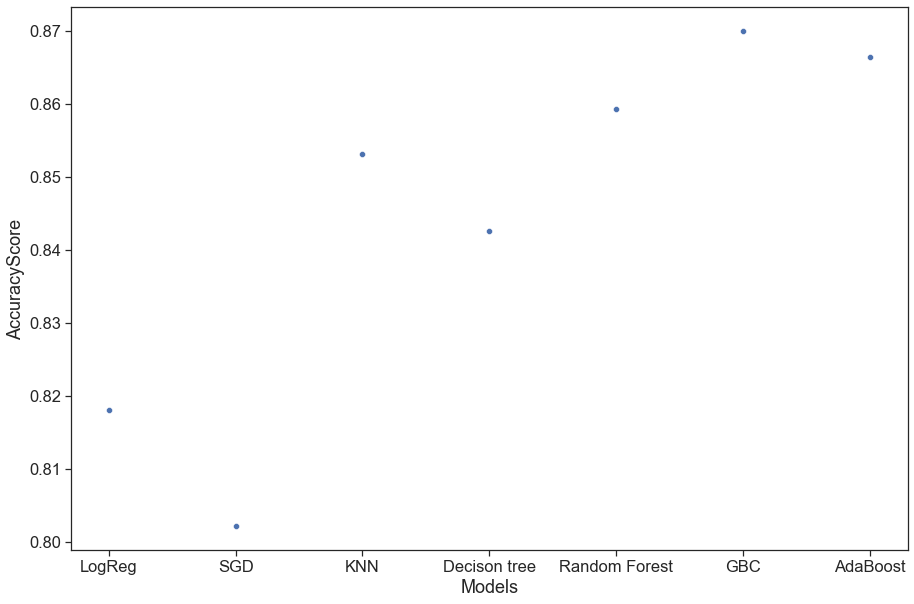

In [64]:
plt.figure(figsize=(15,10))
sns.scatterplot(results['Models'],results['AccuracyScore'])

<AxesSubplot:xlabel='Models', ylabel='Balanced Accuracy Score'>

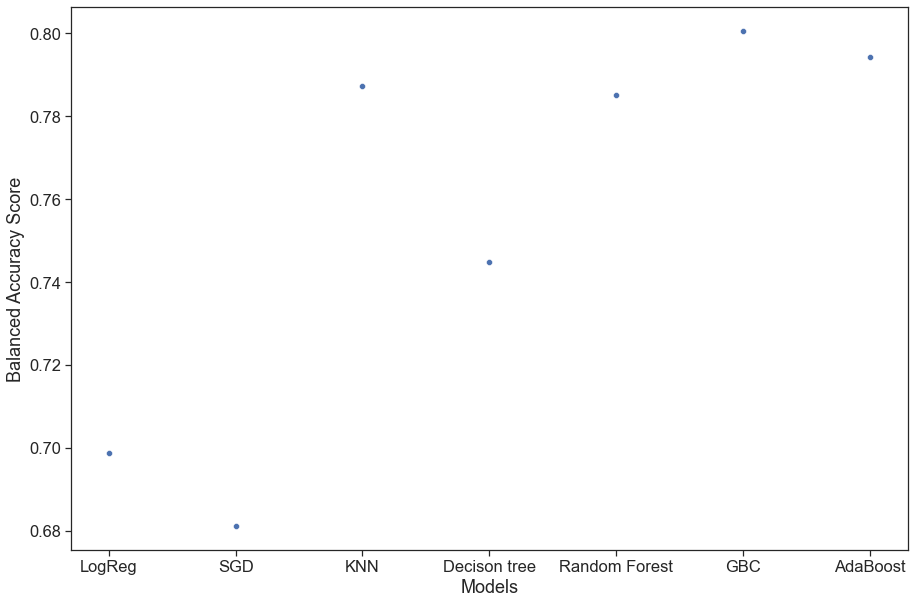

In [65]:
plt.figure(figsize=(15,10))
sns.scatterplot(results['Models'],results['Balanced Accuracy Score'])

<AxesSubplot:xlabel='Models', ylabel='Mean Cross Validation Score'>

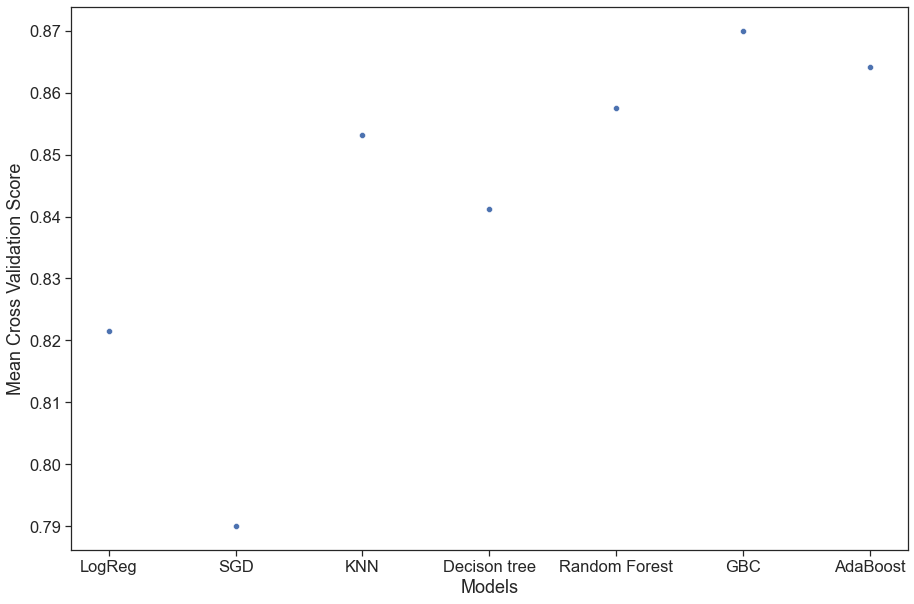

In [66]:
plt.figure(figsize=(15,10))
sns.scatterplot(results['Models'],results['Mean Cross Validation Score'])

<AxesSubplot:xlabel='Models', ylabel='Precision'>

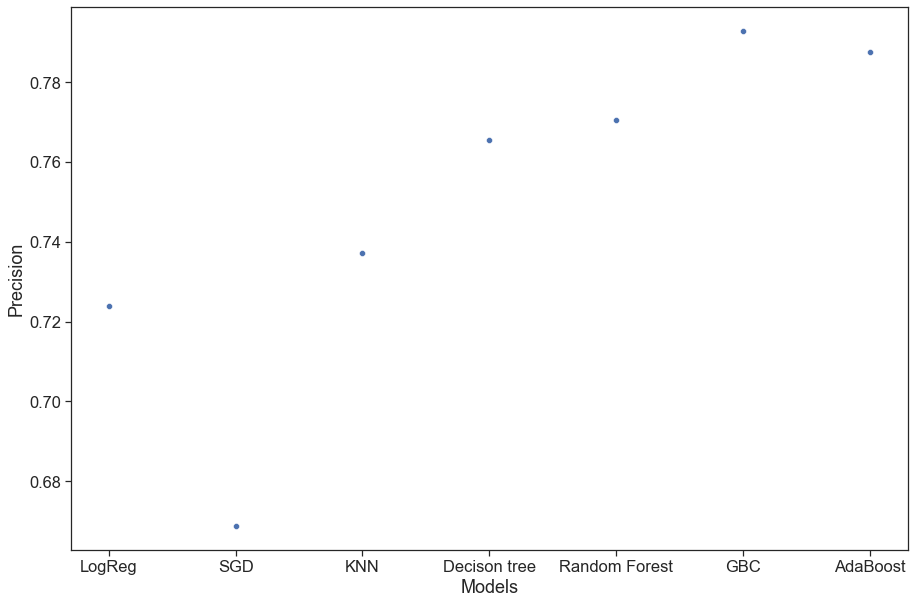

In [67]:
plt.figure(figsize=(15,10))
sns.scatterplot(results['Models'],results['Precision'])

<AxesSubplot:xlabel='Models', ylabel='Recall'>

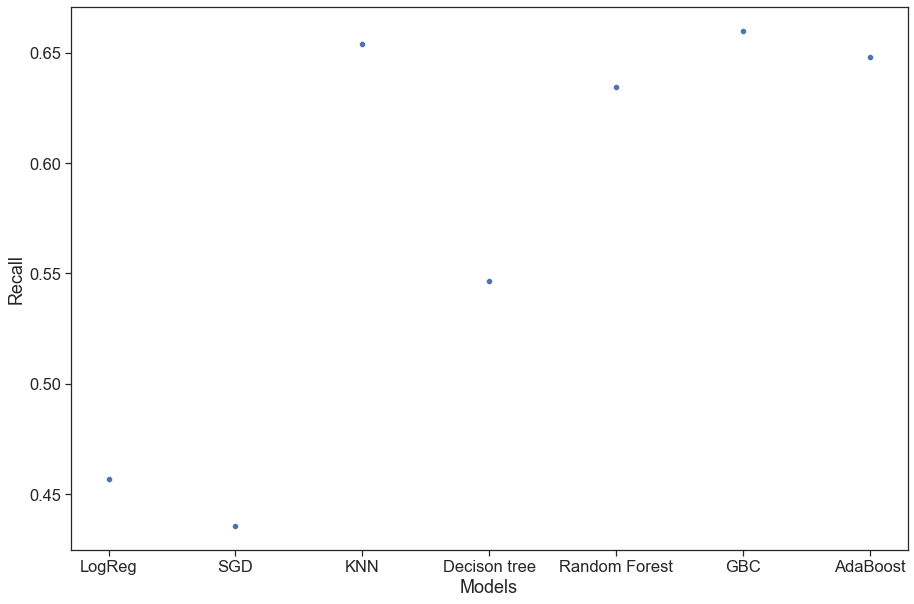

In [68]:
plt.figure(figsize=(15,10))
sns.scatterplot(results['Models'],results['Recall'])

<AxesSubplot:xlabel='Models', ylabel='AUC Score'>

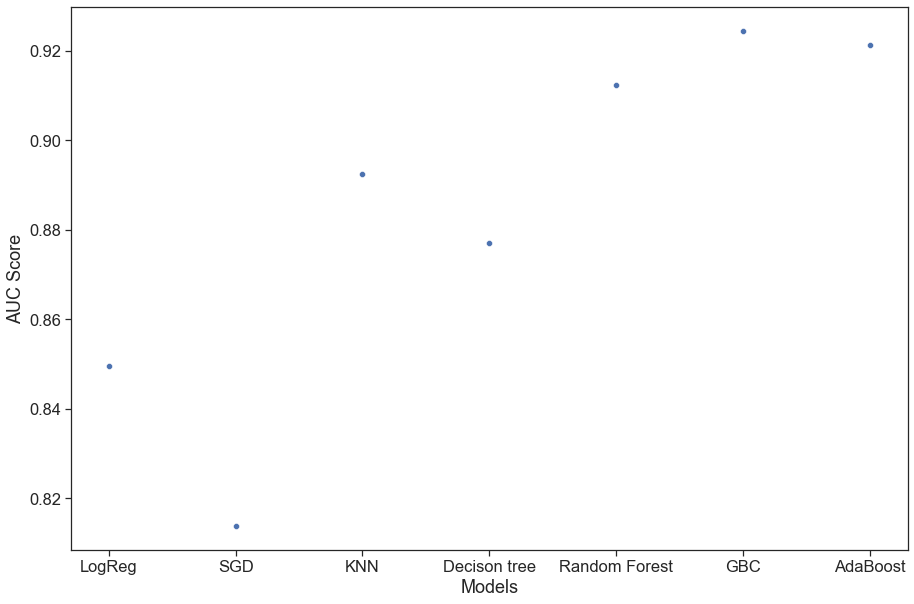

In [69]:
plt.figure(figsize=(15,10))
sns.scatterplot(results['Models'],results['AUC Score'])

In [70]:
results.sort_values(by=['Balanced Accuracy Score'],ascending=False).reset_index(drop=True)


,Models,AccuracyScore,Balanced Accuracy Score,Mean Cross Validation Score,Precision,Recall,AUC Score
0,GBC,0.8699,0.8005,0.869903,0.7927,0.6597,0.924266
1,AdaBoost,0.8664,0.7943,0.864127,0.7876,0.6479,0.921296
2,KNN,0.8531,0.7874,0.853160,0.7372,0.6540,0.892491
3,Random Forest,0.8593,0.7851,0.857577,0.7704,0.6344,0.912364
4,Decison tree,0.8425,0.7448,0.841150,0.7656,0.5464,0.877015
5,LogReg,0.8180,0.6987,0.821580,0.7238,0.4566,0.849672
6,SGD,0.8022,0.6812,0.790070,0.6689,0.4357,0.813937
